<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/Distancia_Euclidiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy 
!pip install rdkit 
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 16.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from scipy.spatial.distance import pdist, squareform
import plotly.figure_factory as ff

In [14]:
mols = [
    Chem.MolFromSmiles("CCC1=CC=C2N=C(C=CC2=C1)C1=NC=CC=C1"), 
    Chem.MolFromSmiles("ClC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1"),
    Chem.MolFromSmiles("FC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1"),
    Chem.MolFromSmiles("C1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1"),
    Chem.MolFromSmiles("CC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1"),
    Chem.MolFromSmiles("ClC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1"),
    Chem.MolFromSmiles("ClC1=C2N=C(C=CC2=CC=C1)C1=CC=NC=C1"),
    Chem.MolFromSmiles("FC1=CC=C2N=C(\\C=C\\C3=NC=CC=C3)C=CC2=C1"),
    Chem.MolFromSmiles("C(=C/C1=NC2=CC=CC=C2C=C1)\\C1=CN=CC=C1"),
    Chem.MolFromSmiles("ClC1=CC=C2N=C(\\C=C\\C3=CN=CC=C3)C=CC2=C1 "),
    Chem.MolFromSmiles("C(=C/C1=NC2=CC=CC=C2C=C1)\\C1=CC=NC=C1"),
    Chem.MolFromSmiles("ClC1=CC=C2N=C(\C=C\C3=CC=NC=C3)C=CC2=C1 ")
]

In [15]:
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]

In [16]:
distance_matrix = squareform(pdist(fps, 'euclidean'))
distance_matrix

array([[0.        , 5.65685425, 5.65685425, 5.29150262, 5.29150262,
        5.47722558, 6.32455532, 5.47722558, 6.40312424, 6.4807407 ,
        6.164414  , 6.32455532],
       [5.65685425, 0.        , 3.46410162, 4.89897949, 4.89897949,
        3.46410162, 5.29150262, 6.164414  , 5.74456265, 4.47213595,
        6.164414  , 5.09901951],
       [5.65685425, 3.46410162, 0.        , 4.89897949, 4.89897949,
        4.89897949, 5.65685425, 5.09901951, 5.74456265, 5.65685425,
        6.164414  , 6.164414  ],
       [5.29150262, 4.89897949, 4.89897949, 0.        , 3.74165739,
        3.74165739, 4.        , 5.83095189, 5.        , 6.164414  ,
        4.24264069, 5.65685425],
       [5.29150262, 4.89897949, 4.89897949, 3.74165739, 0.        ,
        3.46410162, 4.89897949, 6.        , 6.244998  , 6.164414  ,
        5.65685425, 5.47722558],
       [5.47722558, 3.46410162, 4.89897949, 3.74165739, 3.46410162,
        0.        , 4.47213595, 6.        , 6.244998  , 5.09901951,
        5.65685425,

In [17]:
similarity_matrix = 1 / (1 + distance_matrix)
print(similarity_matrix)

[[1.         0.1502211  0.1502211  0.15894454 0.15894454 0.15438709
  0.13652706 0.15438709 0.13507811 0.1336766  0.13957876 0.13652706]
 [0.1502211  1.         0.22400924 0.16952085 0.16952085 0.22400924
  0.15894454 0.13957876 0.14826758 0.182744   0.13957876 0.16396078]
 [0.1502211  0.22400924 1.         0.16952085 0.16952085 0.16952085
  0.1502211  0.16396078 0.14826758 0.1502211  0.13957876 0.13957876]
 [0.15894454 0.16952085 0.16952085 1.         0.21089672 0.21089672
  0.2        0.14639248 0.16666667 0.13957876 0.19074357 0.1502211 ]
 [0.15894454 0.16952085 0.16952085 0.21089672 1.         0.22400924
  0.16952085 0.14285714 0.13802626 0.13957876 0.1502211  0.15438709]
 [0.15438709 0.22400924 0.16952085 0.21089672 0.22400924 1.
  0.182744   0.14285714 0.13802626 0.16396078 0.1502211  0.19074357]
 [0.13652706 0.15894454 0.1502211  0.2        0.16952085 0.182744
  1.         0.1310058  0.13802626 0.1336766  0.1502211  0.14285714]
 [0.15438709 0.13957876 0.16396078 0.14639248 0.142

In [23]:
"Distancia"
lab = ["6","7","8","9","10","11","12","13","14","15","16","17"]
fig = ff.create_dendrogram(distance_matrix, labels= lab)
fig.update_layout(width=800, height=500,  title = "Dendrograma de la distancia euclidiana", title_x=0.5)
fig.show()

<ipython-input-25-dd3825ada509>:6: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



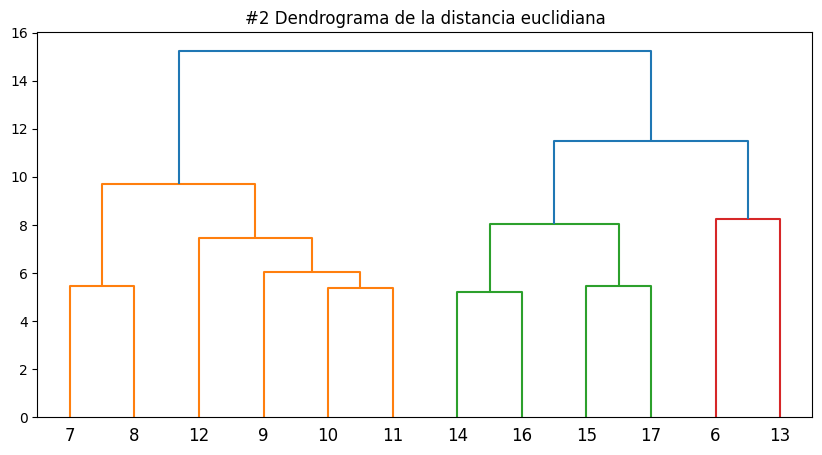

In [25]:
"2da forma"
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("#2 Dendrograma de la distancia euclidiana")
d = shc.dendrogram(shc.linkage(distance_matrix, method = "ward"), labels = lab)